In [1]:
import pandas as pd
import numpy as np

#### DATA loading


In [2]:
#automation for replacing "\" with "/" for python usage 
class data():
    def __init__(self): 
        try:
            self.user_input = input("Enter the path: ")
            self.cleaned = self.user_input.replace("\\", "/").strip('"').strip("'")
            self.raw_data = pd.read_csv(self.cleaned)
            print("Sucessfully loaded")
        except:
            print("Loading unsucessful Enter a valid path")
    
    def load(self):
        return self.raw_data
    
    def fillnone(self):
        threshold = 30.0
        check = self.raw_data.isna().sum()/len(self.raw_data)*100
        for col, nul in check.items():
            if nul < threshold:
                self.raw_data.dropna(inplace=True)
            else:
                print("Need manual intervenation")
        null = self.raw_data.isna().sum()/len(self.raw_data)*100
        print(null)
        print("NA's are sorted sucessfully")
        return self.raw_data


        


In [3]:
df1 = data().fillnone()
df1

Sucessfully loaded
Book Name            0.0
Author               0.0
Rating               0.0
Number of Reviews    0.0
Price                0.0
Description          0.0
Listening Time       0.0
Ranks and Genre      0.0
dtype: float64
NA's are sorted sucessfully


,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time,Ranks and Genre
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,371.0,10080,"Over the past three years, Jay Shetty has beco...",10 hours and 54 minutes,",#1 in Audible Audiobooks & Originals (See Top..."
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3682.0,615,Brought to you by Penguin.,3 hours and 23 minutes,",#2 in Audible Audiobooks & Originals (See Top..."
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20306.0,10378,"In this generation-defining self-help guide, a...",5 hours and 17 minutes,",#3 in Audible Audiobooks & Originals (See Top..."
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4678.0,888,Brought to you by Penguin.,5 hours and 35 minutes,",#5 in Audible Audiobooks & Originals (See Top..."
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4308.0,1005,"Stop going through life, Start growing throug...",6 hours and 25 minutes,",#6 in Audible Audiobooks & Originals (See Top..."
...,...,...,...,...,...,...,...,...
4459,"Factfulness: Wie wir lernen, die Welt so zu se...",Hans Rosling,4.6,72.0,703,"Sorry, we just need to make sure you're not a ...",-1,-1
4460,Late-Talking Children: A Symptom or a Stage?,Stephen M. Camarata,4.6,92.0,703,"Sorry, we just need to make sure you're not a ...",-1,-1
4461,"The Marketing of Evil: How Radicals, Elitists ...",David Kupelian,4.7,490.0,586,"Americans have come to tolerate, embrace, and ...",-1,-1
4462,Things I Wish I'd Known Before We Got Married,Gary Chapman,4.7,1388.0,516,\n\nOops!\nIt's rush hour and traffic is pilin...,-1,-1


In [4]:
(df1 == "-1").sum()

Book Name               0
Author                  0
Rating                  0
Number of Reviews       0
Price                   0
Description             0
Listening Time       2042
Ranks and Genre      2042
dtype: int64

In [5]:
#replacing the -1's with Nan to handle them later 
for col in ["Listening Time","Ranks and Genre"]:
    df1[col] = df1[col].replace("-1",np.nan)


#check the Nan's
df1.isna().sum()

Book Name               0
Author                  0
Rating                  0
Number of Reviews       0
Price                   0
Description             0
Listening Time       2042
Ranks and Genre      2042
dtype: int64

In [6]:
#loading second data 
df2=data().fillnone()
df2

Sucessfully loaded
Book Name            0.0
Author               0.0
Rating               0.0
Number of Reviews    0.0
Price                0.0
dtype: float64
NA's are sorted sucessfully


,Book Name,Author,Rating,Number of Reviews,Price
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313.0,10080.0
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658.0,615.0
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174.0,10378.0
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614.0,888.0
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302.0,1005.0
...,...,...,...,...,...
6362,"False Gods: The Horus Heresy, Book 2",Graham McNeill,4.7,299.0,1138.0
6363,The Hot Flash Club,Nancy Thayer,4.3,191.0,1131.0
6364,The Prophet & The Wanderer,Khalil Gibran,4.1,6.0,539.0
6365,Make Today Count: The Secret of Your Success I...,John C. Maxwell,4.7,301.0,500.0


In [7]:
#REMOVING THE DUPLICATES FROM THE DATA:

df1[df1.duplicated(subset=["Book Name"], keep=False)]

,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time,Ranks and Genre
5,Sapiens,Yuval Noah Harari,4.6,20163.0,1093,Fire gave us power. Farming made us hungry for...,15 hours and 18 minutes,",#4 in Audible Audiobooks & Originals (See Top..."
45,Think and Grow Rich,Napoleon Hill,4.5,22448.0,166,\nBy completing your purchase you agree to Aud...,10 hours and 15 minutes,",#38 in Audible Audiobooks & Originals (See To..."
73,Sapiens,Yuval Noah Harari,4.6,329.0,1171,New York Times Best Seller,21 hours and 42 minutes,",#72 in Audible Audiobooks & Originals (See To..."
255,War and Peace,Leo Tolstoy,4.2,102.0,1406,"Often called the greatest novel ever written, ...",61 hours and 6 minutes,",#440 in Audible Audiobooks & Originals (See T..."
383,The Game,Neil Strauss,4.3,1611.0,797,The Game recounts the incredible adventures of...,9 hours and 27 minutes,",#927 in Audible Audiobooks & Originals (See T..."
...,...,...,...,...,...,...,...,...
4443,Destroying Fear: Strategies to Overthrow the E...,John Ramirez,4.9,422.0,586,\n\nOops!\nIt's rush hour and traffic is pilin...,NaN,NaN
4445,Enterprise Agility: Being Agile in a Changing ...,Sunil Mundra,5.0,10.0,703,"Sorry, we just need to make sure you're not a ...",NaN,NaN
4446,The Sailor Who Fell From Grace With the Sea,Yukio Mishima,4.5,235.0,501,"Sorry, we just need to make sure you're not a ...",NaN,NaN
4447,Big Maria,Johnny Shaw,4.4,586.0,603,"Sorry, we just need to make sure you're not a ...",NaN,NaN


In [8]:
df2[df2.duplicated(subset=["Book Name"], keep=False)]

,Book Name,Author,Rating,Number of Reviews,Price
6,Sapiens,Yuval Noah Harari,4.6,19994.0,1093.0
45,Think and Grow Rich,Napoleon Hill,4.5,22330.0,166.0
93,Sapiens,Yuval Noah Harari,4.6,329.0,1171.0
917,The Wealth of Nations,Adam Smith,4.7,15.0,2847.0
927,"The Blood of Olympus: Heroes of Olympus, Book 5",Rick Riordan,4.6,5722.0,888.0
...,...,...,...,...,...
6361,The Death of WCW,R.D. Reynolds,4.6,271.0,836.0
6362,"False Gods: The Horus Heresy, Book 2",Graham McNeill,4.7,299.0,1138.0
6364,The Prophet & The Wanderer,Khalil Gibran,4.1,6.0,539.0
6365,Make Today Count: The Secret of Your Success I...,John C. Maxwell,4.7,301.0,500.0


In [9]:
for df in [df1, df2]:
    df.drop_duplicates(subset=["Book Name"], keep="first", inplace=True)

In [10]:
#standardizing the columns for better merging 
for df in [df1, df2]:
    df["Book Name"] = df["Book Name"].str.strip().str.lower()
    df["Author"] = df["Author"].str.strip().str.lower()
    df["Price"] =df["Price"].astype(int)

In [11]:
df1["Description"] =df1["Description"].str.strip().str.lower()

In [12]:
#merging both the data's

merged = pd.merge(df1, df2, on=["Book Name","Author","Price"], how="outer", suffixes=("_A", "_B"))
merged

,Book Name,Author,Rating_A,Number of Reviews_A,Price,Description,Listening Time,Ranks and Genre,Rating_B,Number of Reviews_B
0,"""don't you know who i am?"": how to stay sane i...",ramani s. durvasula phd,NaN,NaN,836,NaN,NaN,NaN,4.8,170.0
1,#girlboss,sophia amoruso,4.5,2272.0,615,"sorry, we just need to make sure you're not a ...",NaN,NaN,4.5,2260.0
2,#therealcinderella: #bestfriendsforever series...,yesenia vargas,4.3,179.0,586,oops!\nit's rush hour and traffic is piling up...,NaN,NaN,4.3,179.0
3,10 essential success mantras from the bhagavad...,vimla patil,4.2,45.0,233,"for thousands of years, the bhagavad gita has ...",26 minutes,",#3,076 in Audible Audiobooks & Originals (See...",4.2,45.0
4,10 judgements that changed india,zia mody,NaN,NaN,502,NaN,NaN,NaN,4.4,221.0
...,...,...,...,...,...,...,...,...,...,...
5472,zodiac: the shocking true story of the nation'...,robert graysmith,NaN,NaN,702,NaN,NaN,NaN,4.3,178.0
5473,zog,julia donaldson,4.9,2251.0,190,zog is the keenest dragon in school. he's also...,28 minutes,",#1,966 in Audible Audiobooks & Originals (See...",NaN,NaN
5474,zone to win: organizing to compete in an age o...,geoffrey a. moore,NaN,NaN,586,NaN,NaN,NaN,4.4,104.0
5475,zoology: understanding the animal world,donald e. moore,NaN,NaN,1171,NaN,NaN,NaN,1.0,1.0


In [13]:
#checking duplicates 
merged[merged.duplicated(subset=["Book Name", "Author"], keep=False)]

,Book Name,Author,Rating_A,Number of Reviews_A,Price,Description,Listening Time,Ranks and Genre,Rating_B,Number of Reviews_B
1962,julius caesar,william shakespeare,4.5,227.0,233,"sorry, we just need to make sure you're not a ...",NaN,NaN,NaN,NaN
1963,julius caesar,william shakespeare,NaN,NaN,422,NaN,NaN,NaN,4.5,225.0
3906,the end of the affair,graham greene,4.1,312.0,558,"sorry, we just need to make sure you're not a ...",NaN,NaN,NaN,NaN
3907,the end of the affair,graham greene,NaN,NaN,569,NaN,NaN,NaN,4.1,310.0


In [14]:
agg_rules = {"Rating_A": "first",
             "Number of Reviews_A" : "first",
             "Price" : "mean",
             "Description" : "first",
             "Listening Time" : "first",
             "Ranks and Genre" : "first",
             "Rating_B": "first",
             "Number of Reviews_B" : "first"
             }

In [15]:
#removing duplicates
merged = merged.groupby(["Book Name", "Author"], as_index=False).agg(agg_rules)

In [16]:
merged

,Book Name,Author,Rating_A,Number of Reviews_A,Price,Description,Listening Time,Ranks and Genre,Rating_B,Number of Reviews_B
0,"""don't you know who i am?"": how to stay sane i...",ramani s. durvasula phd,NaN,NaN,836.0,None,None,None,4.8,170.0
1,#girlboss,sophia amoruso,4.5,2272.0,615.0,"sorry, we just need to make sure you're not a ...",None,None,4.5,2260.0
2,#therealcinderella: #bestfriendsforever series...,yesenia vargas,4.3,179.0,586.0,oops!\nit's rush hour and traffic is piling up...,None,None,4.3,179.0
3,10 essential success mantras from the bhagavad...,vimla patil,4.2,45.0,233.0,"for thousands of years, the bhagavad gita has ...",26 minutes,",#3,076 in Audible Audiobooks & Originals (See...",4.2,45.0
4,10 judgements that changed india,zia mody,NaN,NaN,502.0,None,None,None,4.4,221.0
...,...,...,...,...,...,...,...,...,...,...
5470,zodiac: the shocking true story of the nation'...,robert graysmith,NaN,NaN,702.0,None,None,None,4.3,178.0
5471,zog,julia donaldson,4.9,2251.0,190.0,zog is the keenest dragon in school. he's also...,28 minutes,",#1,966 in Audible Audiobooks & Originals (See...",NaN,NaN
5472,zone to win: organizing to compete in an age o...,geoffrey a. moore,NaN,NaN,586.0,None,None,None,4.4,104.0
5473,zoology: understanding the animal world,donald e. moore,NaN,NaN,1171.0,None,None,None,1.0,1.0


#### Cleaning 

In [17]:
merged.isna().sum()

Book Name                 0
Author                    0
Rating_A               1848
Number of Reviews_A    1848
Price                     0
Description            1848
Listening Time         3620
Ranks and Genre        3620
Rating_B                601
Number of Reviews_B     601
dtype: int64

In [18]:
#filling Nans with available data across A to B tables 

merged.loc[:,"Rating_A"] = merged["Rating_A"].fillna(merged["Rating_B"])
merged.loc[:,"Number of Reviews_A"] = merged["Number of Reviews_A"].fillna(merged["Number of Reviews_B"])

#dropping B tables of rating and reviews

merged=merged.drop(columns=["Rating_B", "Number of Reviews_B"])

#renamin the A sux back to original 
merged=merged.rename(columns={"Rating_A":"Rating", "Number of Reviews_A":"Number of Reviews"})

In [19]:
merged.isna().sum()

Book Name               0
Author                  0
Rating                  0
Number of Reviews       0
Price                   0
Description          1848
Listening Time       3620
Ranks and Genre      3620
dtype: int64

In [20]:
#cleaning functions:
import re

#for general text cleaning to remove extr's
def clean_for_user(text):
    text = re.sub(r"[’‘“”\"'#]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip().lower()

#to extract the lanugage out of the title
# list of languages
languages = ['hindi', 'english', 'tamil', 'telugu', 'marathi', 'bengali', 'malayalam', 'kannada', 'urdu']

def extract_language_and_clean(title):
    # find all text inside parentheses
    matches = re.findall(r'\((.*?)\)', title, flags=re.IGNORECASE)
    
    lang_found = None
    for m in matches:
        # check if this parentheses contains a known language
        for lang in languages:
            if lang in m.lower():
                lang_found = lang.lower()
                # remove this particular parenthesis text from the title
                title = re.sub(rf'\({re.escape(m)}\)', '', title, flags=re.IGNORECASE)
                break

    # clean title: remove extra spaces
    title = re.sub(r"[’‘“”\"'#:?]", "", title)
    title_clean = re.sub(r'\s+', ' ', title).strip()

    if lang_found is None:
        lang_found = "english"
   
    return pd.Series([title_clean, lang_found])

#to sort out time string to minutes 
def to_minutes(text):
    if pd.isna(text):
        return 0
    hours = re.search(r'(\d+)\s*hour', text)
    minutes = re.search(r'(\d+)\s*minute', text)
    h=int(hours.group(1)) if hours else 0
    m= int(minutes.group(1)) if minutes else 0
    return h*60+m

#to extract rank and genres:
def extract_genres(text):
    if pd.isna(text):
        return pd.Series([None, None])
    
    text = re.sub(r'See Top 100.*?,?','',text, flags=re.IGNORECASE)
    text = re.sub(r'\b\d+%|\b\d+\s*star','',text, flags=re.IGNORECASE)

    paris =re.findall(r'#?(\d+)\s*in\s*([^,]+)', text)

    ranks =[]
    genres=[]

    for rank, cat in paris:
        cat = re.sub(r'\(.*?\)','', cat)
        cat = re.sub(r'\bin\b','',cat)
        cat = cat.strip().lower()
        if cat:
            genres.append(cat.strip())
        if rank:
            ranks.append(int(rank))
        
    
    genres_clean = ','.join(g.lower() for g in genres) if genres else None

    return pd.Series([genres_clean, ranks])



In [21]:
#cleaning the book name only for extra impurities keeping the : and ? for effective original titles
merged["Book Name"] = merged["Book Name"].apply(clean_for_user)
merged[["Book Name_clean", "Language"]] = merged["Book Name"].apply(extract_language_and_clean)
#convering string to time
merged["Listening Time"] = merged["Listening Time"].apply(to_minutes)
#geting the genres and rank out 
merged[["Genres", "Ranks"]] = merged["Ranks and Genre"].apply(extract_genres)

#fixing the description column 
#fixing the description:
merged["Description"] = merged.apply(lambda row : row["Description"]
                                     if pd.notna(row["Description"])
                                     else f"{row["Book Name_clean"]}by{row["Author"]}-Genre:row{row["Genres"]}", axis=1 )
merged["Description"] = merged["Description"].apply(clean_for_user)


In [22]:
merged.isna().sum()

Book Name               0
Author                  0
Rating                  0
Number of Reviews       0
Price                   0
Description             0
Listening Time          0
Ranks and Genre      3620
Book Name_clean         0
Language                0
Genres               3642
Ranks                3620
dtype: int64

In [23]:
merged

,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time,Ranks and Genre,Book Name_clean,Language,Genres,Ranks
0,dont you know who i am?: how to stay sane in a...,ramani s. durvasula phd,4.8,170.0,836.0,dont you know who i am how to stay sane in an ...,0,None,dont you know who i am how to stay sane in an ...,english,None,None
1,girlboss,sophia amoruso,4.5,2272.0,615.0,"sorry, we just need to make sure youre not a r...",0,None,girlboss,english,None,None
2,"therealcinderella: bestfriendsforever series, ...",yesenia vargas,4.3,179.0,586.0,oops! its rush hour and traffic is piling up o...,0,None,"therealcinderella bestfriendsforever series, b...",english,None,None
3,10 essential success mantras from the bhagavad...,vimla patil,4.2,45.0,233.0,"for thousands of years, the bhagavad gita has ...",26,",#3,076 in Audible Audiobooks & Originals (See...",10 essential success mantras from the bhagavad...,english,"audible audiobooks & originals,hinduism,foreca...","[76, 45, 57, 136]"
4,10 judgements that changed india,zia mody,4.4,221.0,502.0,10 judgements that changed indiabyzia mody-gen...,0,None,10 judgements that changed india,english,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
5470,zodiac: the shocking true story of the nations...,robert graysmith,4.3,178.0,702.0,zodiac the shocking true story of the nations ...,0,None,zodiac the shocking true story of the nations ...,english,None,None
5471,zog,julia donaldson,4.9,2251.0,190.0,zog is the keenest dragon in school. hes also ...,28,",#1,966 in Audible Audiobooks & Originals (See...",zog,english,"audible audiobooks & originals,fantasy,fantasy...","[966, 74, 217, 461]"
5472,zone to win: organizing to compete in an age o...,geoffrey a. moore,4.4,104.0,586.0,zone to win organizing to compete in an age of...,0,None,zone to win organizing to compete in an age of...,english,None,None
5473,zoology: understanding the animal world,donald e. moore,1.0,1.0,1171.0,zoology understanding the animal worldbydonald...,0,None,zoology understanding the animal world,english,None,None


In [36]:
#fixing Genres:
merged["Genres"] = merged["Genres"].fillna("Not Available").str.lower()

In [25]:
#fixing the rank: 
#to sort out the rank:
max_rank = merged["Ranks"].dropna().map(lambda x: min(x) if isinstance(x, list) and len(x)>0 else np.nan).max()
def best_rank(x):
    if isinstance(x, list) and len(x)>0:
        return min(x)
    elif isinstance (x,(int, float)):
        return x
    else:
        return max_rank+1

merged["Best rank"] = merged["Ranks"].apply(best_rank)

In [ ]:
#fxing left out ranks just to give a rank and make it less popular but consider while recommendations:
merged["Ranks"] = merged["Ranks"].fillna(merged["Best rank"])
merged["Ranks and Genre"]= merged["Ranks and Genre"].fillna(merged.apply(lambda row: f"#{int(row['Best rank'])} {str(row['Genres']).lower()}" ,axis=1))
merged["Ranks and Genre"]=merged["Ranks and Genre"].str.strip().str.lower()

In [27]:
merged.isna().sum()

Book Name            0
Author               0
Rating               0
Number of Reviews    0
Price                0
Description          0
Listening Time       0
Ranks and Genre      0
Book Name_clean      0
Language             0
Genres               0
Ranks                0
Best rank            0
dtype: int64

In [37]:
merged

,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time,Ranks and Genre,Book Name_clean,Language,Genres,Ranks,Best rank
0,dont you know who i am?: how to stay sane in a...,ramani s. durvasula phd,4.8,170.0,836.0,dont you know who i am how to stay sane in an ...,0,#949 not available,dont you know who i am how to stay sane in an ...,english,not available,949.0,949.0
1,girlboss,sophia amoruso,4.5,2272.0,615.0,"sorry, we just need to make sure youre not a r...",0,#949 not available,girlboss,english,not available,949.0,949.0
2,"therealcinderella: bestfriendsforever series, ...",yesenia vargas,4.3,179.0,586.0,oops! its rush hour and traffic is piling up o...,0,#949 not available,"therealcinderella bestfriendsforever series, b...",english,not available,949.0,949.0
3,10 essential success mantras from the bhagavad...,vimla patil,4.2,45.0,233.0,"for thousands of years, the bhagavad gita has ...",26,",#3,076 in audible audiobooks & originals (see...",10 essential success mantras from the bhagavad...,english,"audible audiobooks & originals,hinduism,foreca...","[76, 45, 57, 136]",45.0
4,10 judgements that changed india,zia mody,4.4,221.0,502.0,10 judgements that changed indiabyzia mody-gen...,0,#949 not available,10 judgements that changed india,english,not available,949.0,949.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5470,zodiac: the shocking true story of the nations...,robert graysmith,4.3,178.0,702.0,zodiac the shocking true story of the nations ...,0,#949 not available,zodiac the shocking true story of the nations ...,english,not available,949.0,949.0
5471,zog,julia donaldson,4.9,2251.0,190.0,zog is the keenest dragon in school. hes also ...,28,",#1,966 in audible audiobooks & originals (see...",zog,english,"audible audiobooks & originals,fantasy,fantasy...","[966, 74, 217, 461]",74.0
5472,zone to win: organizing to compete in an age o...,geoffrey a. moore,4.4,104.0,586.0,zone to win organizing to compete in an age of...,0,#949 not available,zone to win organizing to compete in an age of...,english,not available,949.0,949.0
5473,zoology: understanding the animal world,donald e. moore,1.0,1.0,1171.0,zoology understanding the animal worldbydonald...,0,#949 not available,zoology understanding the animal world,english,not available,949.0,949.0


In [74]:
#saving the cleaned data:
File_path = "D:/Guvi/Projects/Book recommendations/cleaned_data.csv"

try:
    merged.to_csv(File_path, index=False, encoding="utf-8")
    print(f"Cleaned data saved successfully")
except:
    print(f"Error saving file")


Cleaned data saved successfully


#### EDA 

In [29]:
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [161]:
#use the saved clean csv file for EDA
df = pd.read_csv("D:/Guvi/Projects/Book recommendations/cleaned_data.csv")
df

,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time,Ranks and Genre,Book Name_clean,Language,Genres,Ranks,Best rank
0,dont you know who i am?: how to stay sane in a...,ramani s. durvasula phd,4.8,170.0,836.0,dont you know who i am how to stay sane in an ...,0,#949 not available,dont you know who i am how to stay sane in an ...,english,not available,949.0,949.0
1,girlboss,sophia amoruso,4.5,2272.0,615.0,"sorry, we just need to make sure youre not a r...",0,#949 not available,girlboss,english,not available,949.0,949.0
2,"therealcinderella: bestfriendsforever series, ...",yesenia vargas,4.3,179.0,586.0,oops! its rush hour and traffic is piling up o...,0,#949 not available,"therealcinderella bestfriendsforever series, b...",english,not available,949.0,949.0
3,10 essential success mantras from the bhagavad...,vimla patil,4.2,45.0,233.0,"for thousands of years, the bhagavad gita has ...",26,",#3,076 in audible audiobooks & originals (see...",10 essential success mantras from the bhagavad...,english,"audible audiobooks & originals,hinduism,foreca...","[76, 45, 57, 136]",45.0
4,10 judgements that changed india,zia mody,4.4,221.0,502.0,10 judgements that changed indiabyzia mody-gen...,0,#949 not available,10 judgements that changed india,english,not available,949.0,949.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5470,zodiac: the shocking true story of the nations...,robert graysmith,4.3,178.0,702.0,zodiac the shocking true story of the nations ...,0,#949 not available,zodiac the shocking true story of the nations ...,english,not available,949.0,949.0
5471,zog,julia donaldson,4.9,2251.0,190.0,zog is the keenest dragon in school. hes also ...,28,",#1,966 in audible audiobooks & originals (see...",zog,english,"audible audiobooks & originals,fantasy,fantasy...","[966, 74, 217, 461]",74.0
5472,zone to win: organizing to compete in an age o...,geoffrey a. moore,4.4,104.0,586.0,zone to win organizing to compete in an age of...,0,#949 not available,zone to win organizing to compete in an age of...,english,not available,949.0,949.0
5473,zoology: understanding the animal world,donald e. moore,1.0,1.0,1171.0,zoology understanding the animal worldbydonald...,0,#949 not available,zoology understanding the animal world,english,not available,949.0,949.0


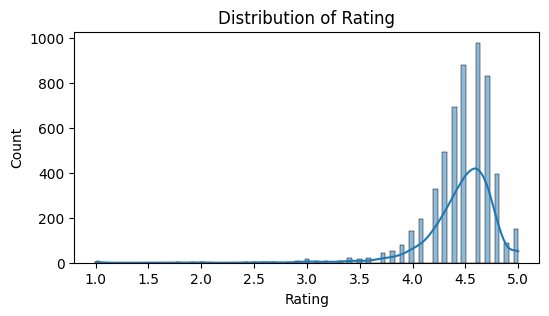

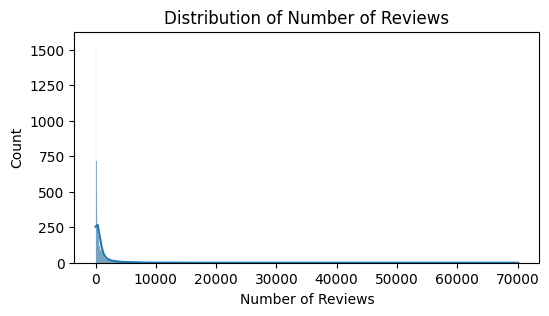

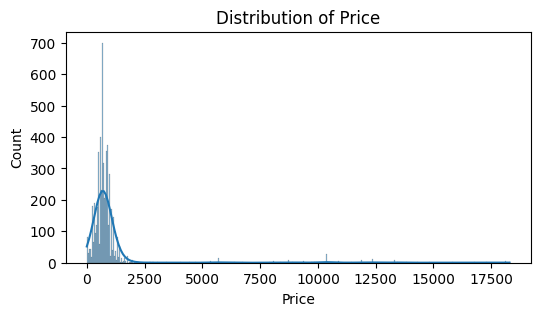

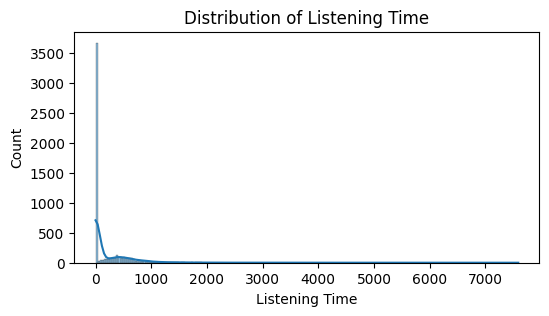

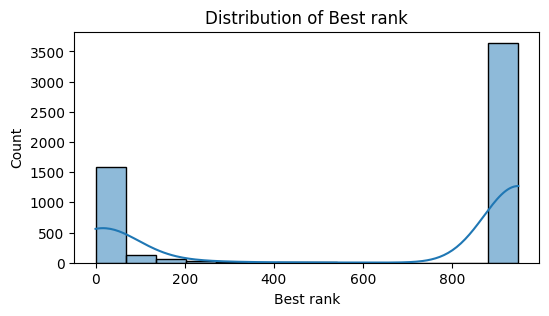

In [162]:
numerical_columns = ["Rating","Number of Reviews","Price", "Listening Time", "Best rank"]
for col in numerical_columns:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

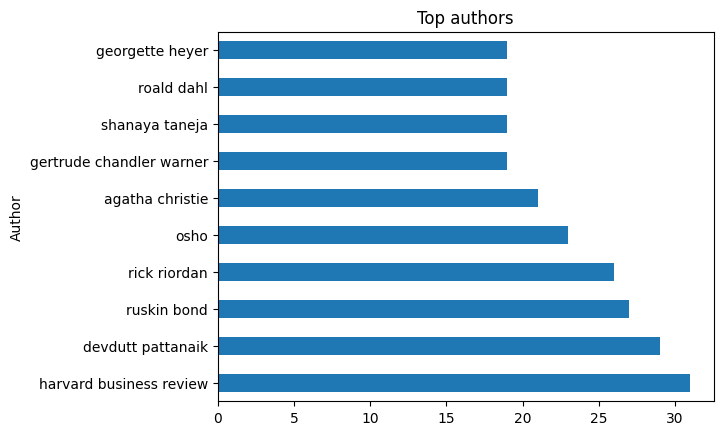

In [39]:
#authors 
merged["Author"].value_counts().head(10).plot(kind="barh", title="Top authors")
plt.show()

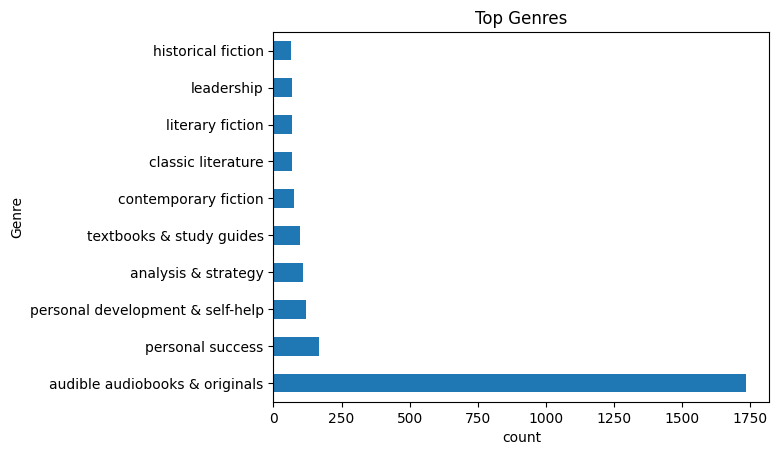

In [40]:
#Genres 
from collections import Counter
from itertools import chain

#filtering not available gneres:
invalid_genres = ["not available"]
filtered_genres = merged[~merged["Genres"].isin(invalid_genres)]

genres_list = filtered_genres["Genres"].str.split(",")
genres_counts = Counter(chain.from_iterable(genres_list))
pd.Series(genres_counts).sort_values(ascending=False).head(10).plot(kind="barh", title="Top Genres")
plt.xlabel("count")
plt.ylabel("Genre")
plt.show()

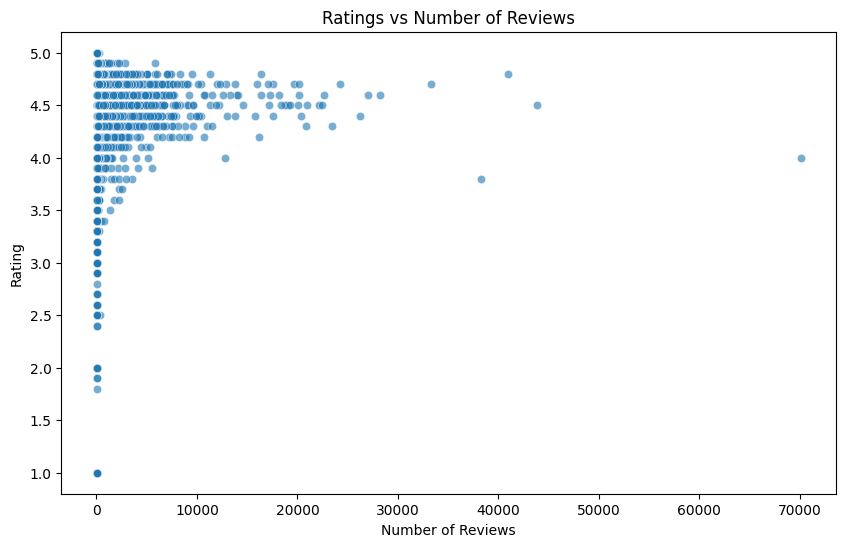

In [253]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Number of Reviews", y="Rating", alpha=0.6)
plt.title("Ratings vs Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.show()

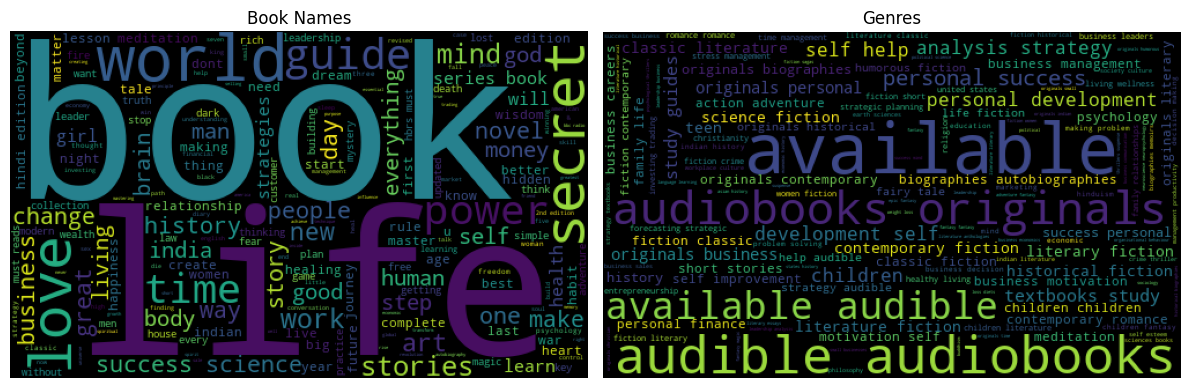

In [165]:
text = " ".join(df["Book Name"].astype(str))
genres = " ".join(df["Genres"].astype(str))
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=500, height=300, background_color="black").generate(text))
plt.title("Book Names")
plt.axis("off")


plt.subplot(1,2,2)
plt.imshow(WordCloud(width=500, height=300, background_color="black").generate(genres))
plt.title("Genres")
plt.axis("off")

plt.tight_layout()
plt.show()


#### Model training

In [184]:
#sorting out num_cols 

num_cols = ['Rating','Number of Reviews', 'Price','Listening Time', 'Best rank']
text_cols = ['Author','Description', 'Book Name_clean','Language', 'Genres']

In [111]:
from sentence_transformers import SentenceTransformer
from hdbscan import HDBSCAN       
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer
from sklearn.metrics.pairwise import cosine_similarity


In [88]:
#NLP feature extraction

merged["combined_text"] = merged[text_cols].agg(' '.join, axis=1)


In [93]:
#text embeding (using Deep learning- Transformers):

model = SentenceTransformer("all-MiniLM-L6-V2")
text_embedings = model.encode(merged["combined_text"].tolist(), show_progress_bar=True)

Batches: 100%|██████████| 172/172 [00:29<00:00,  5.88it/s]


In [179]:
#saving the model:
model.save("sbert_model")

In [104]:
#scaling numerical values:

#fixing the skew for the outliers:
log_columns = ['Rating','Number of Reviews', 'Price','Listening Time']
merged[log_columns] = merged[log_columns].apply(lambda x : np.log1p(x))

scaler = MinMaxScaler()
num_scaled = scaler.fit_transform(merged[log_columns])

In [112]:
#for Best rank 
qt = QuantileTransformer(output_distribution='normal', random_state=42)
merged["Best rank"] = qt.fit_transform(merged[["Best rank"]])

In [185]:
# Converting Best rank to array
best_rank_scaled = merged["Best rank"].values.reshape(-1, 1)

# Combine numeric features
numeric_final = np.hstack([num_scaled, best_rank_scaled])

In [186]:
#text embeding + num scaled -- > for better recommendation system:
final_embeding = np.hstack([text_embedings, numeric_final])

In [223]:
#saving the final embedding:
np.save("final_embeding.npy", final_embeding)

In [209]:
## CLUSTERING USING HDBSCAN + UMAP
import umap
umap_model = umap.UMAP(
    n_neighbors=30,
    n_components=10,
    min_dist=0.1,
    metric="cosine",
    random_state=42
)
umap_embeded = umap_model.fit_transform(final_embeding)

c:\Users\TEMP\Anaconda\envs\stat_viz\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [210]:
#HDBSCAN:
clusterer = HDBSCAN(
    min_cluster_size=15,
    metric='euclidean',
    cluster_selection_method='eom'
)
clusters = clusterer.fit_predict(umap_embeded)

c:\Users\TEMP\Anaconda\envs\stat_viz\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\TEMP\Anaconda\envs\stat_viz\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [211]:
merged["Clusters"] = clusters

In [214]:
#saving the clustered data 

File_path = "D:/Guvi/Projects/Book recommendations/clustered_data.csv"

try:
    merged.to_csv(File_path, index=False, encoding="utf-8")
    print(f"Cleaned data saved successfully")
except:
    print(f"Error saving file")

Cleaned data saved successfully


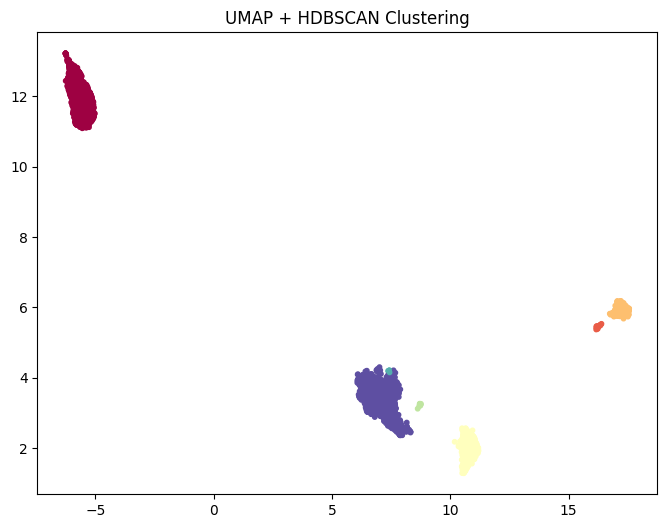

In [212]:
plt.figure(figsize=(8,6))
plt.scatter(
    umap_embeded[:,0], 
    umap_embeded[:,1], 
    c=clusters, 
    cmap='Spectral', 
    s=10
)
plt.title("UMAP + HDBSCAN Clustering")
plt.show()

In [232]:
# Evaluation:
from sklearn.metrics import silhouette_score
from hdbscan import validity

#1 model + clustring evaluation
sil_score = silhouette_score(final_embeding,clusters)
print("Silhouette Score:", sil_score)

#2cluster stats:
unique_cluster = np.unique(clusters[clusters!=-1])
n_clusters = len(unique_cluster)
noise = np.sum(clusters == -1)
noise_ratio = noise/len(clusters)

print(f"Number of clusters : {n_clusters}")
print(f"noise_ratio : {noise_ratio:.2%}")

#3cluster stability score:
stability_score = clusterer.cluster_persistence_
print("Cluster Stability Scores (HDBSCAN persistence):")
for cluster_id, score in zip(unique_cluster, stability_score):
    print(f"Cluster {cluster_id}: {score:.4f}")

#4clustering evaluation:
dbscan_val = validity.validity_index(final_embeding, clusters, metric='euclidean')
print("HDBscan Score :", dbscan_val)

Silhouette Score: 0.3264754719158471
Number of clusters : 7
noise_ratio : 0.00%
Cluster Stability Scores (HDBSCAN persistence):
Cluster 0: 0.1902
Cluster 1: 0.3263
Cluster 2: 0.2096
Cluster 3: 0.2103
Cluster 4: 0.4504
Cluster 5: 0.8761
Cluster 6: 0.1173


c:\Users\TEMP\Anaconda\envs\stat_viz\Lib\site-packages\hdbscan\validity.py:30: RuntimeWarning: overflow encountered in power
  distance_matrix[distance_matrix != 0] = (1.0 / distance_matrix[


HDBscan Score : 0.04252547419703073


### Recommendation system:

In [215]:

sim_books = cosine_similarity(final_embeding)

In [216]:
# Model 1 (Content-Bases)

def recommend_books_name(title, n=5):
    matches = merged[merged["Book Name"] == title.lower()]
    if len(matches) ==0:
        return "Book Not found"
    idx=matches.index[0]
    scores = list(enumerate(sim_books[idx]))
    scores = sorted(scores, key= lambda x: x[1], reverse=True)
    top = scores[1:n+1]
    #using cleaned data for recommendations output
    return df.iloc[[i[0] for i in top]][["Book Name","Author","Language","Rating","Price"]]

In [249]:
#Model 1(Author based):
def recommend_books_Author(name, n=5):
    matches = merged[merged["Author"]==name.lower()]
    if len(matches)==0:
        return "Author not in list"
    author_books = df[df['Author']==name]

    if len(author_books)>=n:
        return author_books.sample(n)[['Book Name','Author','Language','Rating','Price']]
    
    #combine books if there is no enough book for the same author:
    needed = n-len(author_books) 
    other_books = df[df['Author']!=name]
    filler_books = other_books.sample(needed)[['Book Name','Author','Language','Rating','Price']]

    final_result = pd.concat([
        author_books[['Book Name','Author','Language','Rating','Price']], 
        filler_books
    ], ignore_index=True)
    
    return final_result


In [217]:
#Model 2 (Cluster - Based):
def recommend_books_clusters(title, n=5):
    matches = merged[merged["Book Name"] == title.lower()]
    if len(matches) ==0:
        return "Book Not found"
    idx=matches.index[0]
    cluster_id = merged.loc[idx, "Clusters"]
    cluter_books_idx = merged[merged['Clusters']==cluster_id].index
    #using cleaned data for recommendations output
    return df.loc[cluter_books_idx].sample(n)[['Book Name','Author','Language','Rating','Price']]

In [218]:
#Model 3 Hybrid:
def recommend_books_hybrid(title, n=5):
    matches = merged[merged["Book Name"] == title.lower()]
    if len(matches) ==0:
        return "Book Not found"
    idx = matches.index[0]
    text_sim = sim_books[idx]

    score =(
        0.6*text_sim+
        0.2*merged["Rating"].values+
        0.1*merged["Number of Reviews"].values+
        0.1*(1/merged['Price'].values)
    )
    
    top_idx = score.argsort()[::-1][1:n+1]
    ##using cleaned data for recommendations output
    return df.iloc[top_idx][['Book Name','Author','Language','Rating','Price']]

In [251]:
title = input()
print(recommend_books_Author(title))

                                           Book Name  \
0  ask: the counterintuitive online method to dis...   
1                                        royal blood   
2                                      my inventions   
3                                      truth eternal   
4  the hospital: the free short story: the first ...   

                     Author Language  Rating  Price  
0             ryan levesque  english     4.3  516.0  
1                rhys bowen  english     4.6  836.0  
2              nikola tesla  english     4.5  164.0  
3  ram chandra of fatehgarh  english     4.9  668.0  
4        keith c. blackmore  english     3.9    0.0  


In [255]:
merged1 = merged.copy()

In [256]:
def clean_genres(x):
    if pd.isna(x):
        return []
    return [g.strip().lower() for g in x.split(',')]
    
merged1["genre_list"] = merged1["Genres"].apply(clean_genres)

In [264]:
#saving genre files:
File_path = "D:/Guvi/Projects/Book recommendations/genre_data.csv"

try:
    merged1.to_csv(File_path, index=False, encoding="utf-8")
    print(f"Cleaned data saved successfully")
except:
    print(f"Error saving file")

Cleaned data saved successfully


In [269]:
def recommend_by_genre(genre, n=5):
    genre = genre.lower()

    
    genre_matches = merged1[merged1["genre_list"].apply(lambda x: genre in x)]

    if genre_matches.empty:
        return "No books found for this genre"

    
    genre_book_names = genre_matches["Book Name"].str.lower().tolist()

    
    author_books_cleaned = df[df["Book Name"].str.lower().isin(genre_book_names)]

   
    if len(author_books_cleaned) >= n:
        return author_books_cleaned.sort_values("Rating", ascending=False).head(n)[
            ["Book Name", "Author", "Genres", "Rating", "Price"]
        ]

   
    needed = n - len(author_books_cleaned)

    other_books = df[~df["Book Name"].str.lower().isin(genre_book_names)]
    filler = other_books.sample(needed)

   
    final_result = pd.concat([
        author_books_cleaned[["Book Name", "Author", "Genres", "Rating", "Price"]],
        filler[["Book Name", "Author", "Genres", "Rating", "Price"]]
    ], ignore_index=True)

    return final_result

In [270]:
genre = input()
print(recommend_by_genre(genre))

                                              Book Name            Author  \
4672                                        the sandman       neil gaiman   
5471                                                zog   julia donaldson   
1048  doctor who: 10th doctor tales: 10th doctor aud...  peter anghelides   
3425  terry pratchett: bbc radio drama collection: s...   terry pratchett   
1639  house of chains: the malazan book of the fallen 4    steven erikson   

                                                 Genres  Rating   Price  
4672  audible audiobooks & originals,epic fantasy,da...     5.0  1171.0  
5471  audible audiobooks & originals,fantasy,fantasy...     4.9   190.0  
1048  audible audiobooks & originals,science fiction...     4.8  1093.0  
3425  audible audiobooks & originals,fantasy dramati...     4.8  1093.0  
1639     audible audiobooks & originals,fantasy,fantasy     4.7  1025.0  
